In [1]:
#Read in data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.describe

<bound method DataFrame.describe of      Rank  Major_code                                          Major  \
0       1        2419                          PETROLEUM ENGINEERING   
1       2        2416                 MINING AND MINERAL ENGINEERING   
2       3        2415                      METALLURGICAL ENGINEERING   
3       4        2417      NAVAL ARCHITECTURE AND MARINE ENGINEERING   
4       5        2405                           CHEMICAL ENGINEERING   
5       6        2418                            NUCLEAR ENGINEERING   
6       7        6202                              ACTUARIAL SCIENCE   
7       8        5001                     ASTRONOMY AND ASTROPHYSICS   
8       9        2414                         MECHANICAL ENGINEERING   
9      10        2408                         ELECTRICAL ENGINEERING   
10     11        2407                           COMPUTER ENGINEERING   
11     12        2401                          AEROSPACE ENGINEERING   
12     13        2404       

In [2]:
#Drop NA's
raw_data_count = len(recent_grads)
recent_grads = recent_grads.dropna()
cleaned_data_count = len(recent_grads)

print(raw_data_count)
print(cleaned_data_count)

173
172


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193


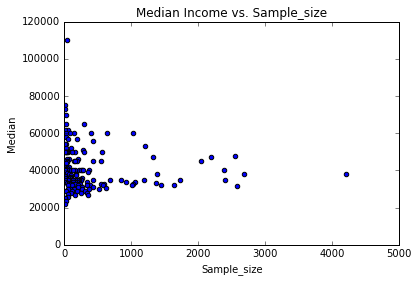

In [3]:
ax = recent_grads.plot(x='Sample_size',y='Median',kind='scatter')
ax.set_xlim(0,5000)
ax.set_title('Median Income vs. Sample_size')

#The median earnings for full time, year-round workers only sems to stay
# within the range of 20,000 to 80,000 per year, there is a visible
# outlier with a median salary at around 110,000 per year

outlier = recent_grads[recent_grads['Median']>=100000]
outlier

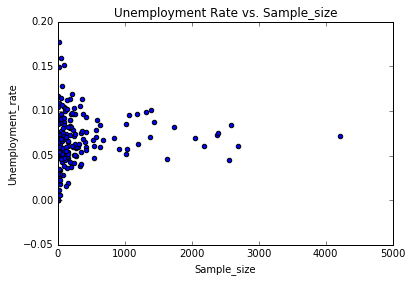

In [4]:
ax = recent_grads.plot(x='Sample_size',y='Unemployment_rate'
                       ,kind='scatter')
ax.set_xlim(0,5000)
ax.set_title('Unemployment Rate vs. Sample_size')

#There doesn't seem to be much of a correlation here either
# unemployment rates vary between majors obviously, but a more
# interesting relationships to look at is the majors with the 
# highhest unemployment rates and what their median salaries are like.

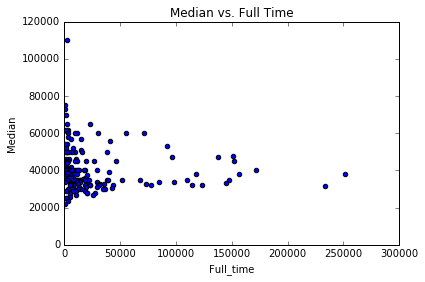

In [5]:
ax = recent_grads.plot(x='Full_time',y='Median',kind='scatter')
ax.set_xlim(0,300000)
ax.set_title('Median vs. Full Time')

#It seems as if the majors with 0-50,000 people have the largest spread
# of median income, however as the number of those employed full time
# increases, the median income spread sharply narrows.
# My guess if that these people are in very populous majors that have 
# a lower top end income potential.

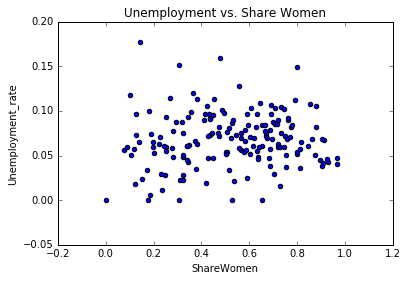

In [6]:
ax = recent_grads.plot(x='ShareWomen',y='Unemployment_rate',
                       kind='scatter')
ax.set_title('Unemployment vs. Share Women')

#The relationship between the unemployment rate and share of women 
# is weak and has no inherent negative or positive correlation.
# I feel that Unemployment rate would be better compared to 
# each major itself rather than the share of women in each major.

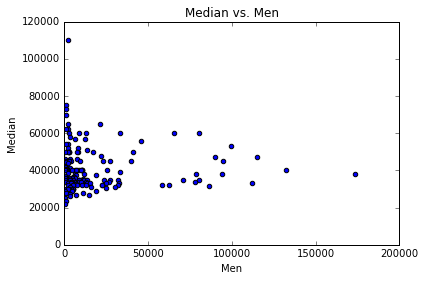

In [7]:
ax = recent_grads.plot(x='Men',y='Median',kind='scatter')
ax.set_xlim(0,200000)
ax.set_title('Median vs. Men')

#The spread seems to more less stay the same, most majors with their
# male count between 0 and 50,000 are making a median income between
# 20,000 to 60,000 a year full time. The bigger the male count has no
# make no change to this interpretation of the data.

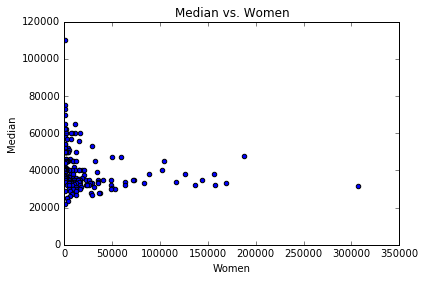

In [8]:
ax = recent_grads.plot(x='Women',y='Median',kind='scatter')
ax.set_xlim(0,350000)
ax.set_title('Median vs. Women')

#The same interpretation for the 'Median vs. Man' plot can be said for
# this one as well. However you can plainly see that there are 
# significantly more women counted than men in this dataset

# Scatter Plot Analysis

- Having dones these preliminary scatter plot graphs of a few key variables, we can infer from these graphs that:

1. Median vs. Sample Size:
    - The median earnings for full time, year-round workers only sems to stay within the range of 20,000 to 80,000 per year, there is a visible outlier with a median salary at around 110,000 per year
    
2. Unemployment Rate vs. Sample Size:
    - There doesn't seem to be much of a correlation here either as the previous plot. Most of the majors seems to hover within the 5-12% unemployment rate.

3. Median vs. Full Time:
    - Most if not all full time workers are falling between the median incomes of 20,000 and 80,000. It seems as if the majors with 0-50,000 people have the largest spread of median income, however as the number of those employed full time increases, the median income spread sharply narrows. My guess is that these people are in very populous majors that have a lower top end income potential.
    
4. Share of Women per Major vs Unemployment Rate:
    - The relationship between the unemployment rate and share of women is weak and has no inherent negative or positive correlation. I feel that Unemployment rate would be better compared to each major itself rather than the share of women in each major.
    
5. Median vs. Men
    - The spread seems to more less stay the same, most majors with their male count between 0 and 50,000 are making a median income between 20,000 to 60,000 a year full time. This interpretation of the data does not change as we look at majors with bigger male counts. 
    
6. Median vs. Women:
    - Same interpretation as the 'Median vs Men' plot. Howevere there is an obvious difference in the number of women and men across majors. Collectively there are significantly more women than there are men in total.

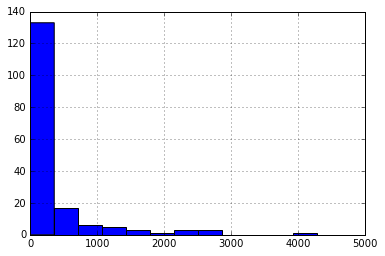

In [9]:
recent_grads['Sample_size'].hist(bins=14,range=(0,5000))

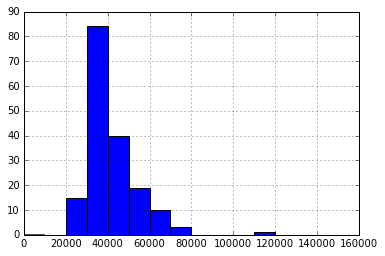

In [10]:
recent_grads['Median'].hist(bins=15,range=(0,150000))

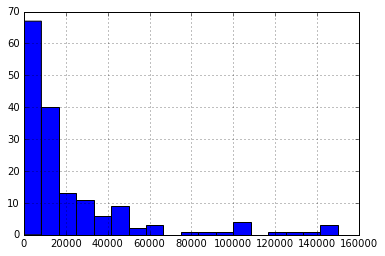

In [11]:
recent_grads['Employed'].hist(bins=18,range=(0,150000))

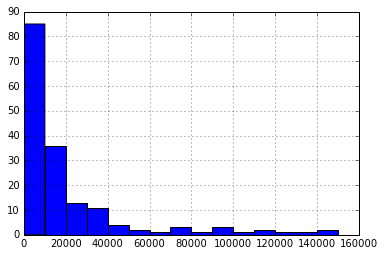

In [12]:
recent_grads['Full_time'].hist(bins=15,range=(0,150000))

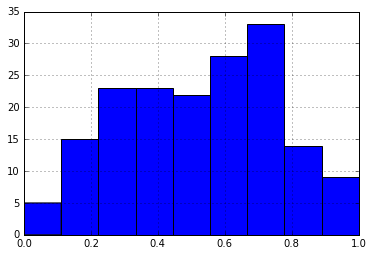

In [13]:
recent_grads['ShareWomen'].hist(bins=9,range=(0,1.0))

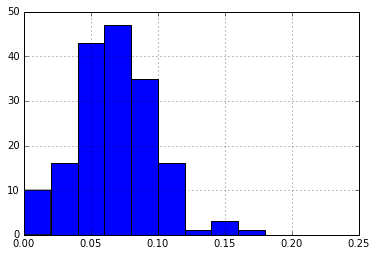

In [18]:
recent_grads['Unemployment_rate'].hist(bins=10,range=(0,0.20))

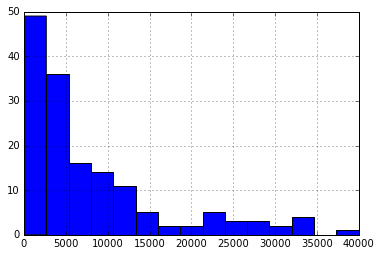

In [21]:
recent_grads['Men'].hist(bins=15,range=(0,40000))

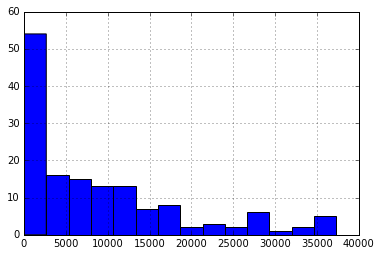

In [22]:
recent_grads['Women'].hist(bins=15,range=(0,40000))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f40b6b697f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f40b68d00f0>]], dtype=object)

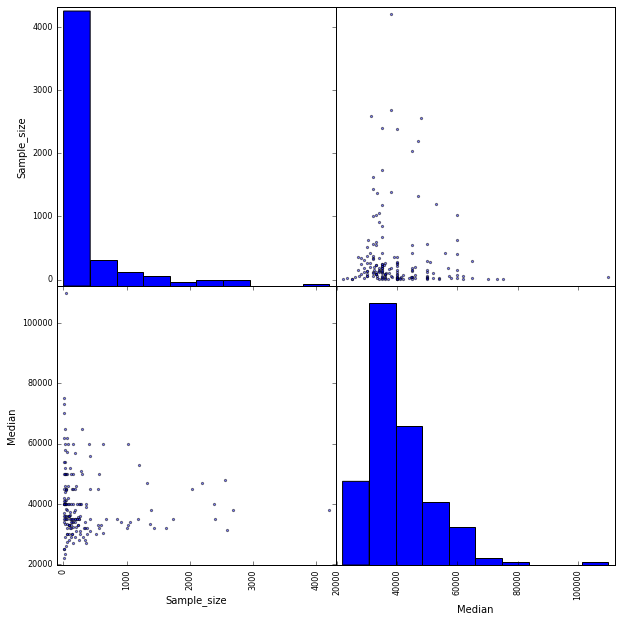

In [25]:
from pandas.tools.plotting import scatter_matrix 
scatter_matrix(recent_grads[['Sample_size','Median']],figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f40b6a826d8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f40b65d2278>]], dtype=object)

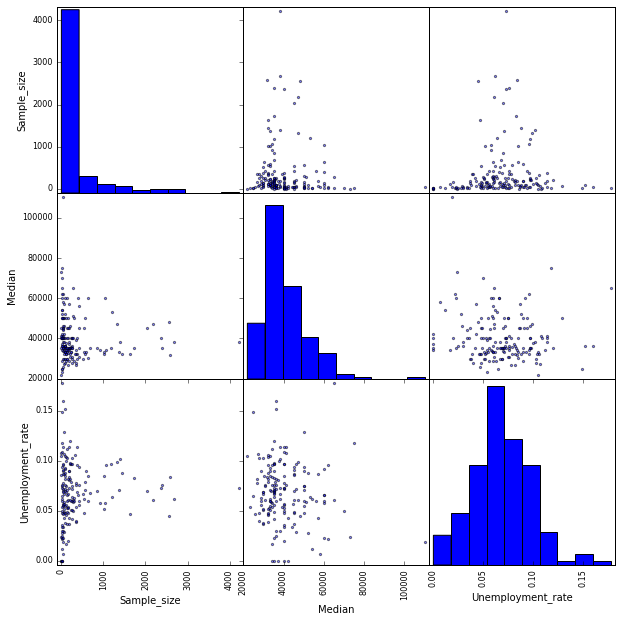

In [27]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']],figsize=(10,10))

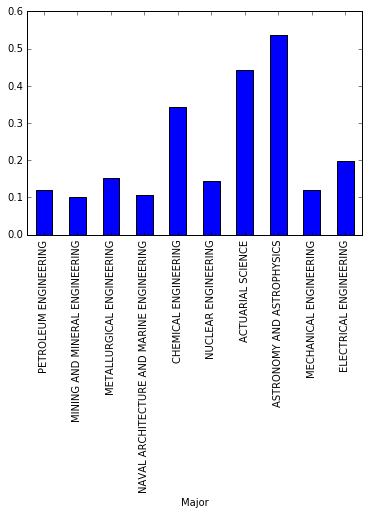

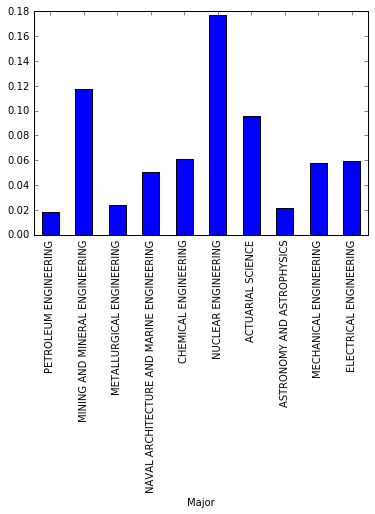

In [29]:
recent_grads[:10].plot.bar(x='Major',y='ShareWomen',legend=False)
recent_grads[:10].plot.bar(x='Major',y='Unemployment_rate',legend=False)